In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
(X_train, _), (X_test, _) = mnist.load_data()


In [20]:

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [21]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
input_img= Input(shape=(784,))





In [25]:
encoded = Dense(units=32, activation='relu')(input_img)

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
decoded = Dense(units=784, activation='sigmoid')(encoded)


In [27]:
autoencoder=Model(input_img, decoded)


In [28]:
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [29]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.0036 - acc: 0.8088 - val_loss: 0.0031 - val_acc: 0.8072
Epoch 2/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0027 - acc: 0.8088 - val_loss: 0.0024 - val_acc: 0.8072
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0021 - acc: 0.8088 - val_loss: 0.0019 - val_acc: 0.8072
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0017 - acc: 0.8088 - val_loss: 0.0016 - val_acc: 0.8072
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0015 - acc: 0.8088 - val_loss: 0.0014 - val_acc: 0.8072
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0013 - acc: 0.8088 - val_loss: 0.0012 - val_acc: 0.8072
Epoch 7/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.0011 - acc: 0.8088 - val_loss: 0.0010 - val_ac

In [33]:
encoder = Model(input_img, encoded)

In [34]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

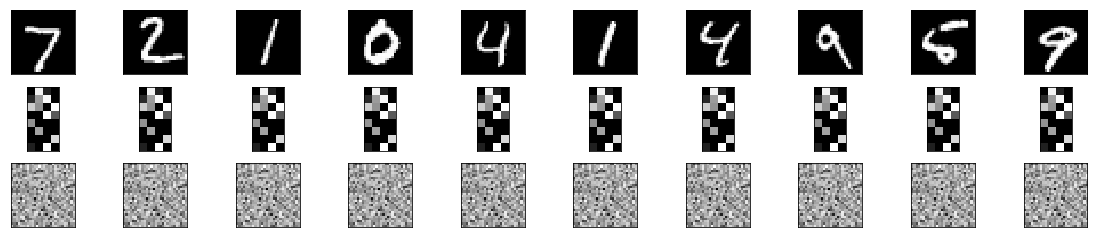

In [50]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()